In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Apr  9 16:02:44 2021

@author: Yilber Quinto
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def punto_fijo(g, x0, tol, M):
    """
    Método de punto fijo

    Parameters
    ----------
    f : Función
        Función de Números reales contracción 
    x0 : float
        Punto inicial
    tol : float
        Tolerancia
    M : int
        Número máximo de interaciones 

    Returns
    -------
    Exito "El cero de la funcion es x = p"
    
    Fracaso " El método fracasó después de M interaciones "

    """
    
    
    valores = [x0]
    error   = [np.nan]
    
    p = 25**(1/3)
    
    i = 0
    while i < M:
        x = g(x0)
        e = np.abs((x - p)/p)
        
        valores.append(float(f'{x:.8f}'))
        error.append(float(f'{e:.8f}'))
        
        if e < tol: 
            df = pd.DataFrame({'x_n':valores,'e_n':error})
            df.to_excel('Tabla_método_punto_fijo.xlsx') 
            display(pd.read_excel("Tabla_método_punto_fijo.xlsx",index_col=0))
            print('')
            print(f'El cero de la función es: {x:.8f}')
            return x
        else:
            x0 = x
        i = i + 1
        
    if i == M:
        df = pd.DataFrame({'x_n':valores,'e_n':error})
        df.to_excel('Tabla_método_PuntoFijo.xlsx') 
        display(pd.read_excel("Tabla_método_punto_fijo.xlsx",index_col=0))
        print(f'No se logró la aproximacón deseada despues de {M} iteraciónes')    



# Ejercicio 24


El número mínimo de iteraciones debe ser mayor que 9.40469


,x_n,e_n
0,3.000000,NaN
1,2.886751,1.274493e-02
2,2.942831,6.434030e-03
3,2.914656,3.201570e-03
4,2.928710,1.604640e-03
5,2.921675,8.013600e-04
6,2.925190,4.009200e-04
7,2.923432,2.004000e-04
8,2.924311,1.002100e-04
9,2.923871,5.010000e-05



El cero de la función es: 2.92401545


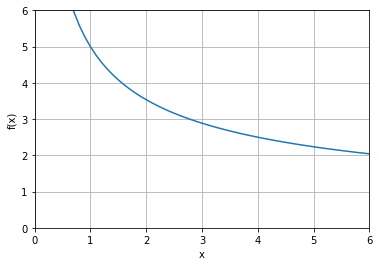

In [4]:
# Determinación del número de iteraciones 

p  = 25**(1/3)
q  = 5/16
x0 = 3.0
x1 = 5/(np.sqrt(x0))

a = (np.log((p*(1-q)*10**(-6))/np.abs(x1 - x0)))/np.log(q)

print('')
print(f'El número mínimo de iteraciones debe ser mayor que {a:.5f}')



# Aplicación del método de punto fijo 

def fun24(x):
    return 5/(x**(1/2))


x = punto_fijo(fun24, x0, 1e-6, 40)



fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')    
plt.grid() # visualiza la cuadricula en la figura    
plt.ylim(0, 6)
plt.xlim(0, 6)    

    
z = np.linspace(0.1,10, 100)
y = fun24(z)

#y2 = np.sin(z)*f(z)

plt.plot(z, y, label='f1')
#plt.plot(z,y2, label='f2')

#plt.legend(loc='upper left')
plt.savefig("Ejercicio_24.eps")

plt.show()